### 군집분석

In [2]:
import pandas as pd
import numpy as np

from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [3]:
okt=Okt()
df=pd.read_csv('clustering.csv')
df.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [4]:
doc=[]
for i in df['기사내용']:
    doc.append(okt.nouns(i))
    
for i in range(len(doc)):
    doc[i]=' '.join(doc[i])

In [5]:
doc[0]

'유한양행 얀 바이오 테크 표적 항암 치료 제의 기술이전 계약 체결 공시 총 기술 수출 금액 한화 약 로 계약금 개발 허가 매출 단계 별 마일 스톤 총 수령 예정 경상 기술 료 매출 액 책정 유한양행 관계자 기술이전 계약 수익 인식 임상시험 허가 등 여부 수 미실 현 가능성 고'

In [8]:
cv=CountVectorizer()
X=cv.fit_transform(doc)

In [9]:
df_cv=pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
df_cv

,가격,가능성,가동,가면,가수,가스,가요,가운데,가정,가지,...,확인,확충,환경,환경부,활동,효소,후기,후보,훌쩍,흡연
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5,0,0,2,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
kmeans=KMeans(n_clusters=3).fit(df_cv)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 0])

In [12]:
len(cv.get_feature_names())

504

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [15]:
pca=PCA(n_components=2)
PC=pca.fit_transform(df_cv)

In [16]:
PC_df=pd.DataFrame(data=PC,columns=['pc1','pc2'])
PC_df.index=df['검색어']

In [17]:
PC_df

,pc1,pc2
검색어,,
유한양행,-2.242731,-4.594793
유한양행,-3.635268,-9.964414
유한양행,-3.122115,-8.063214
유한양행,-2.173843,-4.324949
유한양행,-3.718471,-10.181178
라돈,-4.254111,1.913542
라돈,-4.253149,1.226101
라돈,-7.237635,8.976589
라돈,-7.908448,10.239211


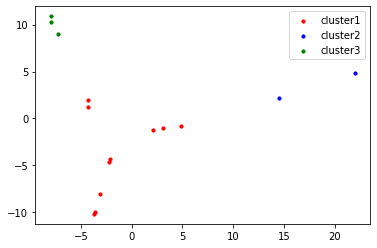

In [20]:
plt.scatter(PC_df.iloc[kmeans.labels_==0,0],PC_df.iloc[kmeans.labels_==0,1],
           s=10,c='red',label='cluster1')
plt.scatter(PC_df.iloc[kmeans.labels_==1,0],PC_df.iloc[kmeans.labels_==1,1],
           s=10,c='blue',label='cluster2')
plt.scatter(PC_df.iloc[kmeans.labels_==2,0],PC_df.iloc[kmeans.labels_==2,1],
           s=10,c='green',label='cluster3')

plt.legend()
plt.show()

### 계층 분할

In [22]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [23]:
df_cv

,가격,가능성,가동,가면,가수,가스,가요,가운데,가정,가지,...,확인,확충,환경,환경부,활동,효소,후기,후보,훌쩍,흡연
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5,0,0,2,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
cluster=AgglomerativeClustering(n_clusters=3,linkage='ward')
cluster.fit_predict(df_cv)

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 0], dtype=int64)

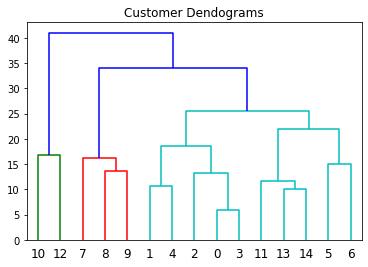

In [26]:
plt.figure()
plt.title("Customer Dendograms")
dend=shc.dendrogram(shc.linkage(df_cv,method='ward'))

In [27]:
print(doc[5])

최근 침대 매트리스 매트 라돈 검 소식 가정 곳곳 라돈 검 대한 우려 불 이 직접 라돈 측정기 사용 주민 늘 대구 경우 대구시 지난 가정 용 라돈 측정기 대여 료 대구시 당시 가정 용 라돈 측정기 구입 개 구청 및 군청 신분증 신청서 작성 사용 료 선납 뒤 박 수 라돈 측정기 벽 천장 바닥 등 이상 사용 출입문 창가 전자제품 곳 측정기 뒤 방문 및 창문 공간 밀폐 다음 측정기 전원 가동 단위 자동 측정 이상 가동 측정값 수


In [28]:
print(doc[11])

복면 왕 출연 왕밤빵 패 얼굴 공개 축음기 단비 관심 지난 방송 예능 프로그램 복면 왕 왕밤빵 축음기 왕 자리 대결 그 결과 왕밤빵 왕 날 축음기 박정현 미아 로 가창력 자랑 왕밤빵 패 이 축음기 가면 정체 바로 가수 천단 단비 방송 후 자신 인스타그램 통해 제 노래 무대 순간 마는 유독 또 순간 하나 더 더 노래 고 복면 왕 출연 소감 전 단비 슈퍼스타 출연 주목 데뷔 건빵 선생 별사탕 눈물샘 데뷔 바 슈스케 준우승 후 각종 참여 노래 온 단비 지난해 봄 거짓말 발매 팬 사랑


## 과제

In [31]:
from konlpy.tag import Hannanum

han=Hannanum()

In [32]:
doc=[]
for i in df['기사내용']:
    doc.append(han.nouns(i))
    
for i in range(len(doc)):
    doc[i]=' '.join(doc[i])

In [34]:
doc[0]

'유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성'

In [35]:
cv=CountVectorizer()
X=cv.fit_transform(doc)

In [36]:
df_cv=pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
df_cv

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [37]:
kmeans=KMeans(n_clusters=3).fit(df_cv)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0])

In [38]:
len(cv.get_feature_names())

581

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [40]:
pca=PCA(n_components=2)
PC=pca.fit_transform(df_cv)

In [41]:
PC_df=pd.DataFrame(data=PC,columns=['pc1','pc2'])
PC_df.index=df['검색어']

In [42]:
PC_df

,pc1,pc2
검색어,,
유한양행,-2.245407,-4.167462
유한양행,-3.613952,-9.898557
유한양행,-2.932635,-7.159364
유한양행,-2.142773,-3.757125
유한양행,-3.397879,-8.904297
라돈,-3.456162,0.931170
라돈,-4.172640,2.527032
라돈,-6.418892,7.240861
라돈,-7.928539,10.011249


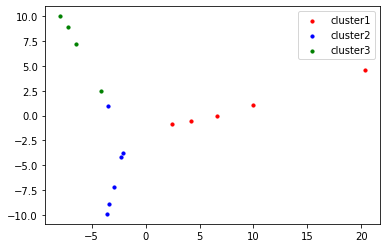

In [43]:
plt.scatter(PC_df.iloc[kmeans.labels_==0,0],PC_df.iloc[kmeans.labels_==0,1],
           s=10,c='red',label='cluster1')
plt.scatter(PC_df.iloc[kmeans.labels_==1,0],PC_df.iloc[kmeans.labels_==1,1],
           s=10,c='blue',label='cluster2')
plt.scatter(PC_df.iloc[kmeans.labels_==2,0],PC_df.iloc[kmeans.labels_==2,1],
           s=10,c='green',label='cluster3')

plt.legend()
plt.show()

In [44]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [45]:
df_cv

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [46]:
cluster=AgglomerativeClustering(n_clusters=3,linkage='ward')
cluster.fit_predict(df_cv)

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

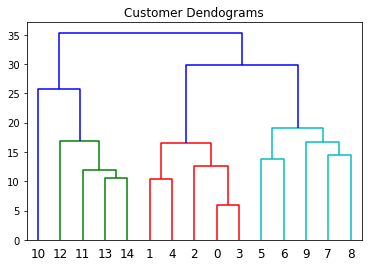

In [47]:
plt.figure()
plt.title("Customer Dendograms")
dend=shc.dendrogram(shc.linkage(df_cv,method='ward'))

In [48]:
doc[0]

'유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성'

In [49]:
doc[3]

'유한양행 얀센 바이오테크((Janssen 상피세포성장인자수용체 표적 항암 치료제 기술이전 계약 5일 공시 기술수출금액 미화 12억5천500 달러 계약금 5천 달러 개발 허가 매출 단계별 마일스톤 12억500 달러 수령 예정 계약 지역 한국 제외 전 세계'